In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [3]:
from dataloader import *
from display import *
# from dataloader import load_nosepoint, reag_img_part1

In [4]:
part1_transform = transforms.Compose([Rescale((60, 80)),])

In [5]:
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
person_idx = np.arange(32)
viewpt_idx = np.arange(6)
training_set = NoseKeypointDataset(person_idx, viewpt_idx, part1_transform)
# training_set = FaceKeypointsDataset(person_idx, viewpt_idx)
dataloader = DataLoader(training_set, batch_size=4, shuffle=True)

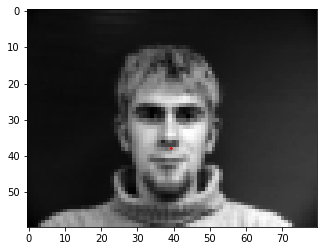

In [6]:
# Plotting a few input images and their nose keypoints.
plt.figure()
show_keypoints(training_set[0]['image'], training_set[0]['keypoints'])
plt.show()

In [11]:
from cnn import nosefinder
from torch.nn import MSELoss
from torch.optim import Adam

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 4, (60, 80, 1), 3, (1, 2)

# randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

input_data = training_set
model = nosefinder
loss_fn = MSELoss()
learning_rate = 1e-3
optimizer = Adam(nosefinder.parameters(), lr=learning_rate)

epochs = 10
for i in range(epochs):
    nose_pred = nosefinder(i) # predicted nose keypoint coordinate
    # nose_pred is a dictionary of the form {'image': im_arr, 'keypoints': [nose_keypoint]}

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    loss.backward()
    optimizer.step()



TypeError: conv2d(): argument 'input' (position 1) must be Tensor, not int

In [265]:
# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
person_idx = np.arange(32, 40)
viewpt_idx = np.arange(6)
validation_set = NoseKeypointDataset(person_idx, viewpt_idx, part1_transform)

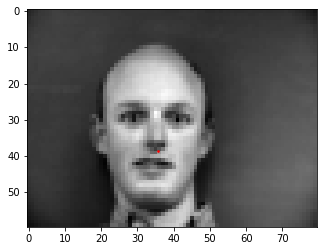

In [266]:
# Plotting a few input images and their nose keypoints.
plt.figure()
show_landmarks(validation_set[0]['image'], validation_set[0]['keypoints'])
plt.show()